In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [137]:
df = pd.read_csv(r'D:\2213002\autism_screening.csv')

In [138]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [139]:
col_names = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation' , 'Class/ASD']
df.columns=col_names

In [140]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [142]:
labels=df['Class/ASD'].unique().tolist()

In [143]:
lbl_enc = OrdinalEncoder()
df[col_names] = lbl_enc.fit_transform(df[col_names])

In [144]:
X = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']

In [145]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [146]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

In [147]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [148]:
labels=df['Class/ASD'].unique().tolist()

In [149]:
lbl_enc=OrdinalEncoder()
for i in col_names:
    df[i]=lbl_enc.fit_transform(df[[i]])

In [150]:
X = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [152]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)

entropy_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [153]:
print('Training Accuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:', entropy_clf.score(X_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


[Text(0.5, 0.75, 'X[17] <= 6.5\nentropy = 0.838\nsamples = 471\nvalue = [345, 126]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 345\nvalue = [345, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 126\nvalue = [0, 126]')]

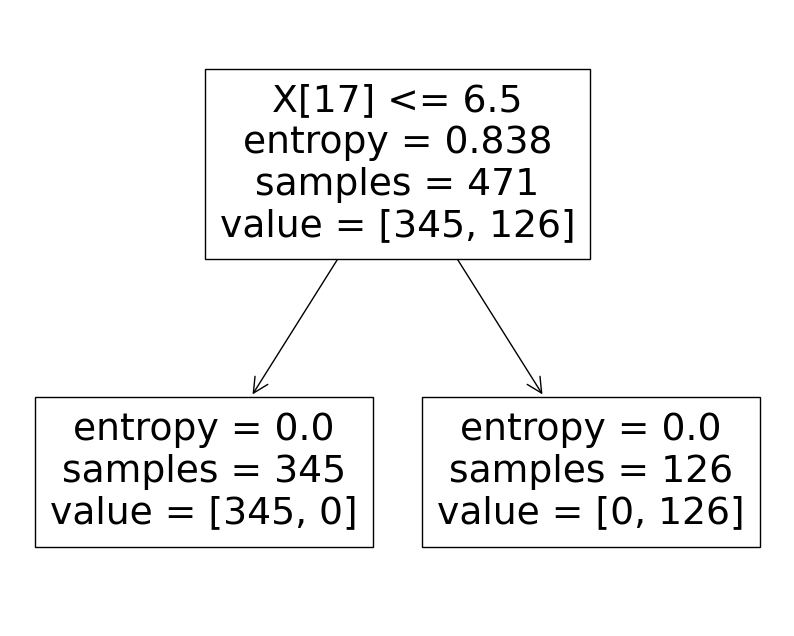

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train, y_train)) 

In [164]:
col_names_str = [str(col) for col in col_names]
labels_str = [str(label) for label in labels]

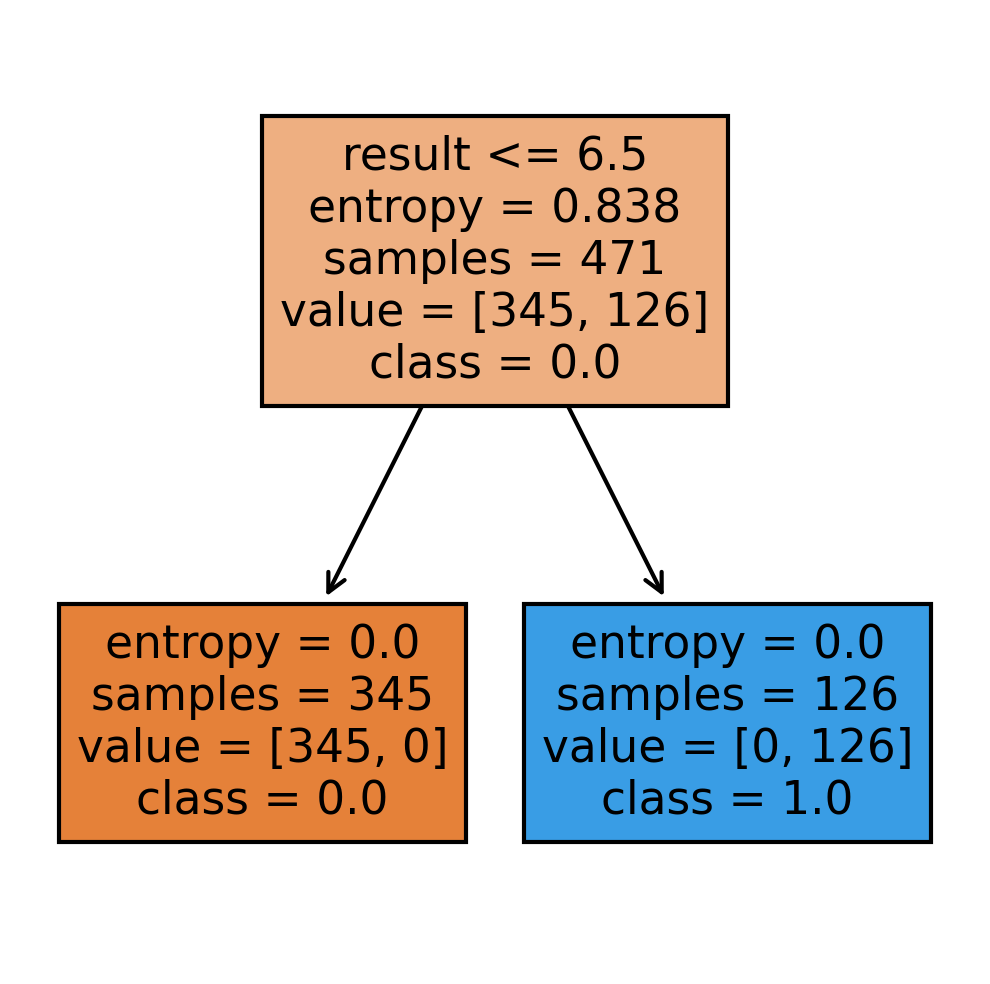

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(entropy_clf, feature_names=col_names_str, class_names=labels_str, filled=True)
fig.savefig('imagename.png')